In [70]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [71]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [107]:
X_train = X_train/255
X_test=X_test/255


In [108]:
len(X_train)

60000

In [109]:
X_train.shape

(60000, 28, 28)

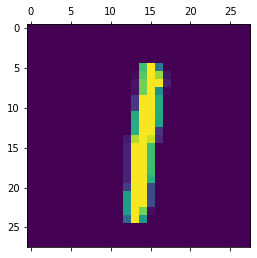

In [122]:
plt.matshow(X_train[40])

In [123]:
Y_train[40]

1

In [112]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [113]:
X_train.shape

(60000, 28, 28)

In [114]:
X_train_flattened.shape

(60000, 784)

In [115]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [117]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4698 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.9260


In [118]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 0s 942us/step - loss: 0.2707 - accuracy: 0.9237


[0.2707313001155853, 0.9236999750137329]

In [124]:
y_predicted = model.predict(X_test_flattened)
y_predicted[40]

array([0.00230715, 0.9946322 , 0.48245007, 0.5097732 , 0.01521131,
       0.28296813, 0.2507635 , 0.23708421, 0.4369089 , 0.24875984],
      dtype=float32)

In [125]:
np.argmax(y_predicted[40])

1

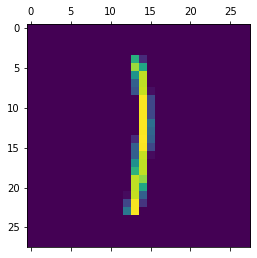

In [127]:
plt.matshow(X_test[40])

In [128]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [130]:

cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    4,    2,    0,    7,   11,    3,    2,    0],
       [   0, 1118,    4,    1,    0,    1,    4,    2,    5,    0],
       [   4,    9,  952,    6,    8,    2,   12,    9,   28,    2],
       [   3,    0,   34,  910,    0,   22,    3,   10,   21,    7],
       [   1,    1,    7,    0,  927,    0,   11,    3,   10,   22],
       [   9,    3,    7,   34,   12,  766,   18,    6,   32,    5],
       [   7,    3,   10,    1,    7,    8,  918,    2,    2,    0],
       [   1,   11,   31,    6,   10,    1,    0,  939,    2,   27],
       [   5,   14,   10,   18,    9,   24,   10,   12,  868,    4],
       [   9,    7,    2,   10,   47,    7,    0,   28,   11,  888]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

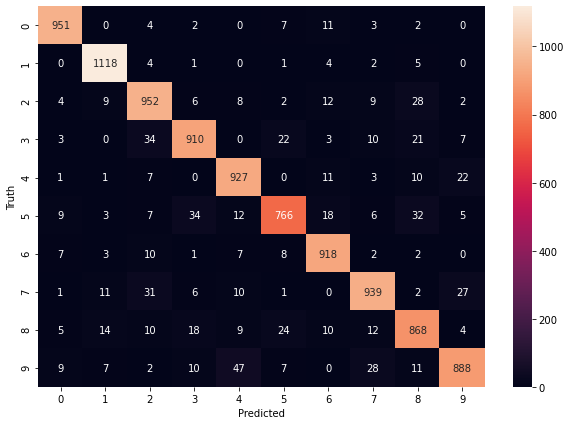

In [131]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')